### LSTM Deep Learning Model

Import nessasary library

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
import seaborn as sns
#os.chdir('data')
#from colorsetup import colors, palette
#plt.style.use('fivethirtyeight')
#sns.set_palette(palette)
import pandas as pd
from datetime import datetime
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout

import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Import Data

In [2]:
import yfinance as yf

#define the ticker symbol
tickerSymbol = 'AAPL'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
stock_master = tickerData.history(period='1d', start='2021-1-1', end='2022-2-9')

#see your data
stock_master.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-31,133.088938,133.744064,130.746382,131.709213,99116600,0.0,0
2021-01-04,132.533066,132.622397,125.823032,128.453445,143301900,0.0,0
2021-01-05,127.937301,130.766241,127.480694,130.041626,97664900,0.0,0
2021-01-06,126.775939,130.081327,125.445840,125.664215,155088000,0.0,0
2021-01-07,127.411196,130.657029,126.914892,129.952271,109578200,0.0,0


<AxesSubplot:xlabel='Date'>

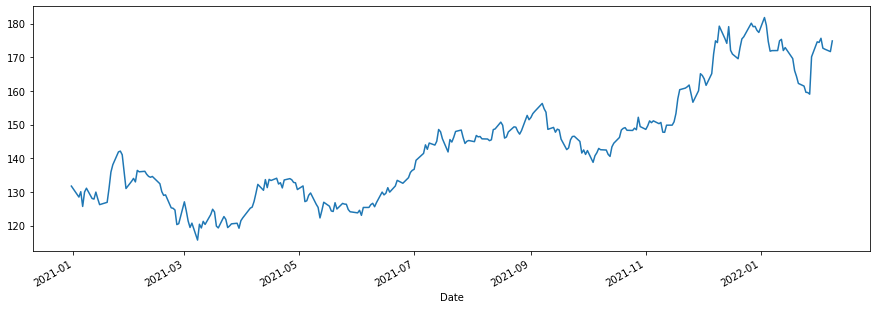

In [3]:
import matplotlib.pyplot as plt

#quick plot of full time series
plt.figure(figsize = (15,5))
stock_master['Close'].plot()

<class 'numpy.ndarray'>
279


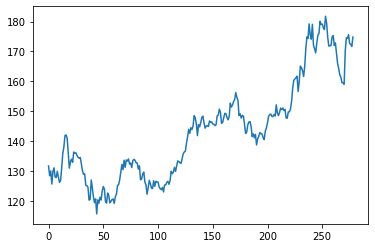

In [4]:
dataset = stock_master[['Close']].to_numpy()
print(type(dataset))
print(len(dataset))
plt.plot(dataset)
plt.show()

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

223 56


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
print('Training input shape: {}'.format(trainX.shape))
print('Training output shape: {}'.format(trainY.shape))
print('Test input shape: {}'.format(testX.shape))
print('Test output shape: {}'.format(testY.shape))

Training input shape: (221, 1, 1)
Training output shape: (221,)
Test input shape: (54, 1, 1)
Test output shape: (54,)


In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
221/221 - 3s - loss: 0.0307
Epoch 2/100
221/221 - 0s - loss: 0.0103
Epoch 3/100
221/221 - 0s - loss: 0.0077
Epoch 4/100
221/221 - 0s - loss: 0.0051
Epoch 5/100
221/221 - 0s - loss: 0.0033
Epoch 6/100
221/221 - 0s - loss: 0.0020
Epoch 7/100
221/221 - 0s - loss: 0.0013
Epoch 8/100
221/221 - 0s - loss: 0.0011
Epoch 9/100
221/221 - 0s - loss: 9.8717e-04
Epoch 10/100
221/221 - 0s - loss: 9.7188e-04
Epoch 11/100
221/221 - 0s - loss: 9.7843e-04
Epoch 12/100
221/221 - 0s - loss: 9.4421e-04
Epoch 13/100
221/221 - 0s - loss: 9.7493e-04
Epoch 14/100
221/221 - 0s - loss: 9.9227e-04
Epoch 15/100
221/221 - 0s - loss: 9.8470e-04
Epoch 16/100
221/221 - 0s - loss: 0.0010
Epoch 17/100
221/221 - 1s - loss: 9.7497e-04
Epoch 18/100
221/221 - 0s - loss: 0.0010
Epoch 19/100
221/221 - 0s - loss: 9.7463e-04
Epoch 20/100
221/221 - 0s - loss: 9.8035e-04
Epoch 21/100
221/221 - 0s - loss: 9.4957e-04
Epoch 22/100
221/221 - 0s - loss: 9.8192e-04
Epoch 23/100
221/221 - 0s - loss: 0.0010
Epoch 24/100
221/2

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.03 RMSE
Test Score: 3.40 RMSE


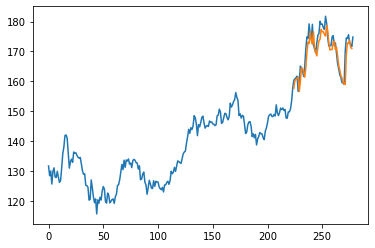

In [13]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()